<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/miscellaneous/09_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXERCISE 9**

Fulfill the following tasks in this exercise:

1. Create neural network model in many stages, *i.e.* from basic to improved model.
2. Try to visualize things as many as you can.
3. Evaluate performance metrics such as MAE and MSE.
4. Compare all models you built and gain insight which model performs best.


> Try to make helper/utility functions, which you think you may need them again in near future.

In [124]:
# Importing tensorflow
import tensorflow as tf
print("Tensorflow version we're using: ", tf.__version__)

Tensorflow version we're using:  2.18.0


In [125]:
# Importing other dependencies
import numpy as np
import matplotlib.pyplot as plt

### Creating Features and Labels tensors

In [126]:
# Creating features
X = tf.range(-30,50, 3) # from -30 to +50 with a step of 3
X

<tf.Tensor: shape=(27,), dtype=int32, numpy=
array([-30, -27, -24, -21, -18, -15, -12,  -9,  -6,  -3,   0,   3,   6,
         9,  12,  15,  18,  21,  24,  27,  30,  33,  36,  39,  42,  45,
        48], dtype=int32)>

In [127]:
# Creating labels
y = X + 5
y

<tf.Tensor: shape=(27,), dtype=int32, numpy=
array([-25, -22, -19, -16, -13, -10,  -7,  -4,  -1,   2,   5,   8,  11,
        14,  17,  20,  23,  26,  29,  32,  35,  38,  41,  44,  47,  50,
        53], dtype=int32)>

In [128]:
# Coverting int tensors into float tensors
X = tf.cast(X, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)

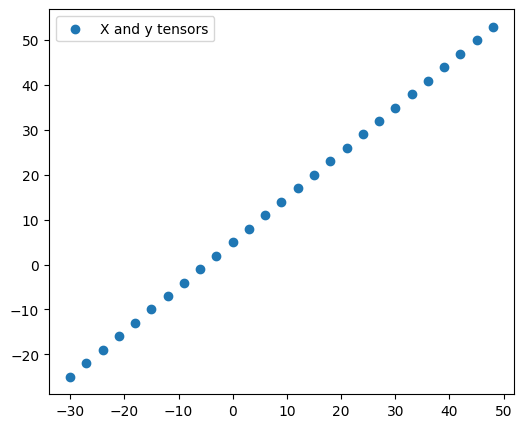

In [129]:
# Visualizing feature and labels tensors
plt.figure(figsize=(6,5))
plt.scatter(X, y, label="X and y tensors")
plt.legend()

### Splitting into training and testing sets

In [130]:
# First let's check if both features and labels are equal in length or not
len(X) == len(y)

True

In [131]:
# Checking features length so we can split
len(X)

27

In [132]:
# Splitting into training tensor sets
X_train = X[:18]  # giving 0 to 18 samples out of 27 for training
y_train = y[:18]  # ,,


# Splitting into testing tensor sets
X_test = X[18:]   # giving remaining samples after 18
y_test = y[18:]  # ,,

In [133]:
print("Length of X_train: ", len(X_train))
print("Length of X_test: ", len(X_test))

print("Length of y_train: ", len(y_train))
print("Length of y_test: ", len(y_test))

Length of X_train:  18
Length of X_test:  9
Length of y_train:  18
Length of y_test:  9


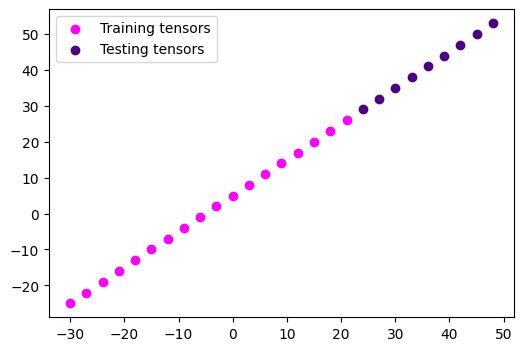

In [134]:
# Visualizing our training and testing tensor sets
plt.figure(figsize=(6,4))

# Plotting training tensor sets
plt.scatter(X_train, y_train, c="magenta", label="Training tensors")

# Plotting testing tensor sets
plt.scatter(X_test, y_test, c="indigo", label="Testing tensors")

# Plotting legend
plt.legend()

### Making basic model

In [135]:
tf.random.set_seed(42) # random seed for reproducability

# 1. Create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step - loss: 16.1459 - mae: 16.1459
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 14.3234 - mae: 14.3234
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 12.5009 - mae: 12.5009
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 10.7067 - mae: 10.7067
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 9.0596 - mae: 9.0596


In [136]:
# Making predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[11.178333],
       [12.575347],
       [13.972361],
       [15.369375],
       [16.76639 ],
       [18.163403],
       [19.560417],
       [20.95743 ],
       [22.354445]], dtype=float32)

In [137]:
# Let's see how much it is aligning with testing labels
y_test

<tf.Tensor: shape=(9,), dtype=float32, numpy=array([29., 32., 35., 38., 41., 44., 47., 50., 53.], dtype=float32)>

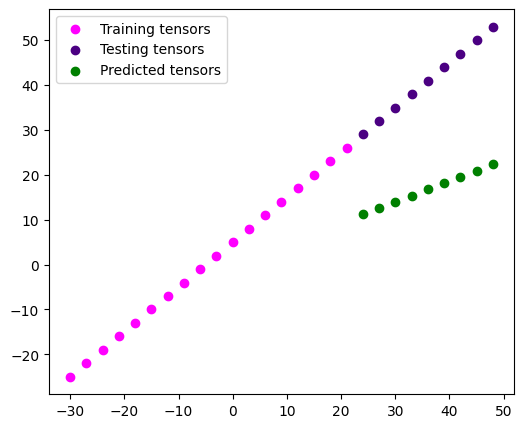

In [138]:
# Let's visualize the predictions
plt.figure(figsize=(6,5))
plt.scatter(X_train, y_train, color="magenta", label="Training tensors")

plt.scatter(X_test, y_test, color="indigo", label="Testing tensors")

plt.scatter(X_test, y_pred, color="green", label="Predicted tensors")

plt.legend()

Woah!! Looking close , why not we calculate it metrics

#### Calculating MAE and MSE metrics scores

In [139]:
mae = tf.metrics.MeanAbsoluteError()(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred)).numpy()  # squeezing y_pred to match y_test shape
mae

np.float32(24.23361)

In [140]:
mse = tf.metrics.MeanSquaredError()(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred)).numpy()
mse

np.float32(604.39825)

Now we gonna use this methodology:
```
* Building a model
* Make predictions
* Visualize it
* Calculate metrics
```

If we're gonna such much things now, it's better idea to create some helper functions or utility functions so that we don't have to write code again and again for the same functionality.

### Creating some helper/utility functions

`Function for plotting predictions`

In [141]:
def plot_predictions(train_data = X_train,
                 test_data = X_test,
                 train_label = y_train,
                 test_label = y_test,
                 predictions = y_pred):

  plt.figure(figsize=(6,5))

  plt.scatter(train_data, train_label, color="magenta", label="Training tensors")
  plt.scatter(test_data, test_label, color="indigo", label="Testing tensors")
  plt.scatter(test_data, predictions, color="green", label="Predicted tensors")

  plt.legend()

`Function for calculating MAE and MSE`

In [142]:
def mae(y_true, y_pred):
  return tf.metrics.MeanAbsoluteError()(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.MeanSquaredError()(y_true, tf.squeeze(y_pred))

### Let's Do Modelling experiment now

* `model_1` -> With 1 dense layer and trained on *100* epochs.
* `model_2` -> With 2 dense layers and trained on *100* epochs.
* `model_3` -> With 2 dense layers and trained on *500* epochs.
* `model_4` -> With 2 dense layers , with Adam optimizer trained on *100* epochs.
* `model_5` -> With 2 dense layers, with Adam optimizer trained on *500* epochs.

> ### `Build model_1`

```
With 1 dense layer and trained on 100 epochs
```

In [143]:
# Building model_1
tf.random.set_seed(42)   # random seed for reproducability

# 1. Create a model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
# Making predictions
y_pred_1 = model_1.predict(tf.expand_dims(X_test, axis=-1))
y_pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[21.07261 ],
       [23.60238 ],
       [26.132153],
       [28.661924],
       [31.191694],
       [33.721466],
       [36.25124 ],
       [38.78101 ],
       [41.31078 ]], dtype=float32)

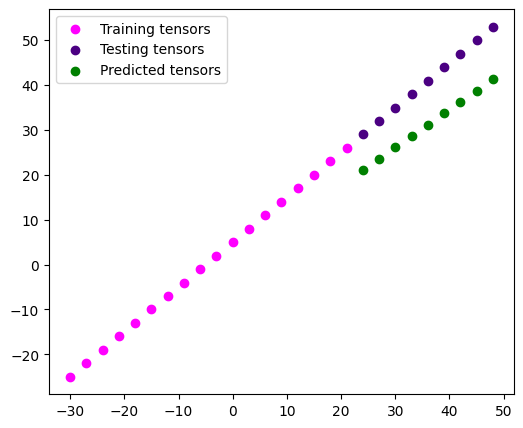

In [145]:
# Visualizing model_1
plot_predictions(predictions=y_pred_1)

In [146]:
# Woah! Let's check performance metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=9.808305740356445>,
 <tf.Tensor: shape=(), dtype=float32, numpy=97.67694091796875>)

> ### `Build model_2`

```
With 2 dense layer and trained on 100 epochs
```

In [147]:
# Building model_2
tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),  # input_shape for automatic model build
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [148]:
# Making predictions
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[21.522516],
       [23.912691],
       [26.30287 ],
       [28.693047],
       [31.083223],
       [33.473404],
       [35.86358 ],
       [38.253754],
       [40.643932]], dtype=float32)

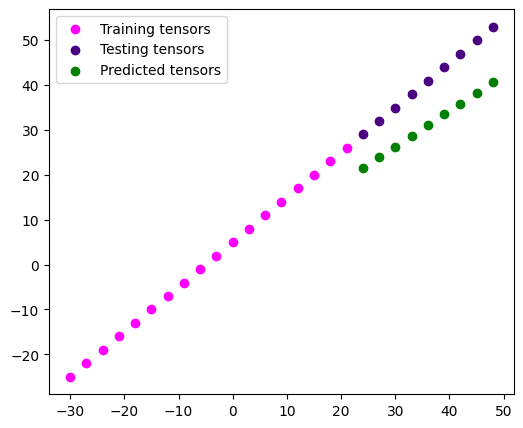

In [149]:
# Visualizing predictions
plot_predictions(predictions=y_pred_2)

In [150]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=9.916776657104492>,
 <tf.Tensor: shape=(), dtype=float32, numpy=100.8216781616211>)

> ### `Build model_3`

```
With 2 dense layers and trained on 500 epochs
```

In [151]:
# Building model_3
tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

In [152]:
# Making predictions
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[30.668678],
       [33.893112],
       [37.117542],
       [40.34198 ],
       [43.566414],
       [46.79085 ],
       [50.01528 ],
       [53.239716],
       [56.464153]], dtype=float32)

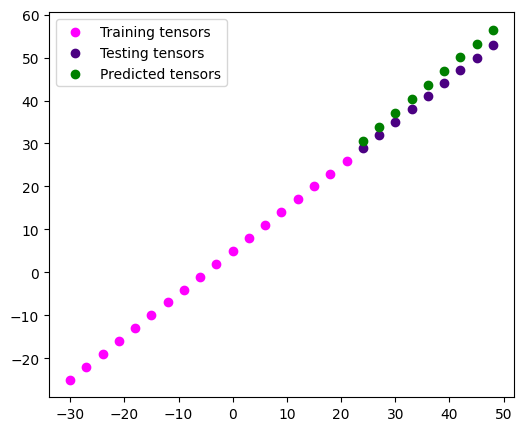

In [153]:
# Visualizing predictions
plot_predictions(predictions=y_pred_3)

In [154]:
# Calculating metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=2.5664143562316895>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.922287940979004>)

> ### `Build model_4`

```
With 2 dense layers , with Adam optimizer trained on 100 epochs.
```

In [155]:
# Building model_4
tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

# 3. Fit the model
model_4.fit(X_train, y_train, epochs=100, verbose=0)


In [156]:
# Making predictions
y_pred_4 = model_4.predict(X_test)
y_pred_4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[22.954378],
       [25.605303],
       [28.256226],
       [30.907152],
       [33.558075],
       [36.209007],
       [38.85993 ],
       [41.51085 ],
       [44.161777]], dtype=float32)

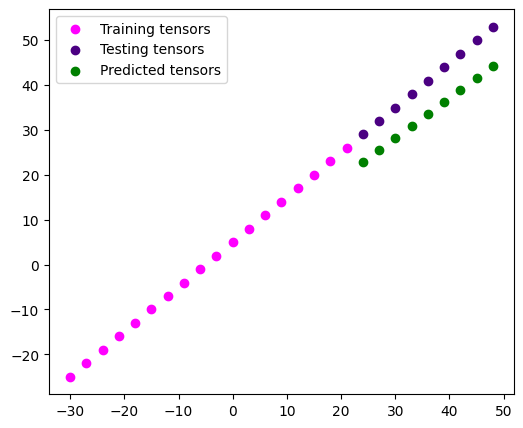

In [157]:
# Visualizing the predictions
plot_predictions(predictions=y_pred_4)

In [158]:
# Calculate the metrics
mae_4 = mae(y_test, y_pred_4)
mse_4 = mse(y_test, y_pred_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=7.441923141479492>,
 <tf.Tensor: shape=(), dtype=float32, numpy=56.1945686340332>)

>   ### `Build model_5`

```
With 2 dense layers , with Adam optimizer trained on 500 epochs.
```

In [159]:
# Building model_5
tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

# 3. Fit the model
model_5.fit(X_train, y_train, epochs=500, verbose=0)

In [160]:
# Make predictions
y_pred_5 = model_5.predict(X_test)
y_pred_5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[29.025501],
       [32.02871 ],
       [35.031906],
       [38.035122],
       [41.038326],
       [44.041527],
       [47.04473 ],
       [50.04794 ],
       [53.051144]], dtype=float32)

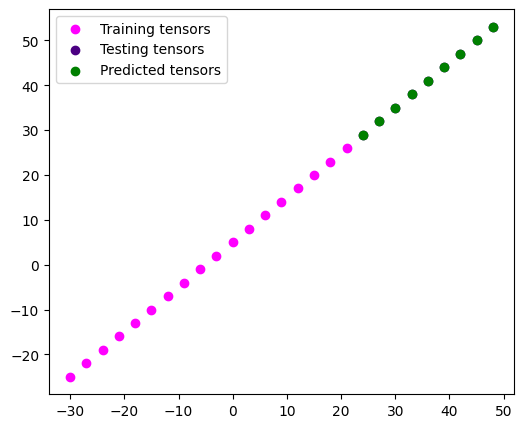

In [161]:
# Visualizing the predictions
plot_predictions(predictions=y_pred_5)

### **WOAH!!! Almost the perfect predictions**

In [162]:
# Still let's check for MAE and MSE
mae_5 = mae(y_test, y_pred_5)
mse_5 = mse(y_test, y_pred_5)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=0.038322873413562775>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.001537132658995688>)

In [123]:
# Using Pandas DataFrame for a tabular structure
import pandas as pd
prediction_data = [["model_1", mae_1.numpy(), mse_1.numpy()],
                   ["model_2", mae_2.numpy(), mse_2.numpy()],
                   ["model_3", mae_3.numpy(), mse_3.numpy()],
                   ["model_4", mae_4.numpy(), mse_4.numpy()],
                   ["model_5", mae_5.numpy(), mse_5.numpy()]]

final_predictions_data = pd.DataFrame(prediction_data, columns=["MODELS", "MeanAbsoluteError (MAE)", "MeanSquaredError (MSE)"])
final_predictions_data

,MODELS,MeanAbsoluteError (MAE),MeanSquaredError (MSE)
0,model_1,9.652695,94.517540
1,model_2,9.991277,102.351692
2,model_3,6.751059,47.445824
3,model_4,7.876247,62.946819
4,model_5,0.136616,0.019539


# **Comparing our different experimental models**

### From the above evaluation dataframe , we can see this

```
model_5 > model_3 > model_4 > model_1 > model_2
```

It goes from best performance model to worst performance model

# Hence we got `model_5` as our best model.

In [163]:
model_5.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

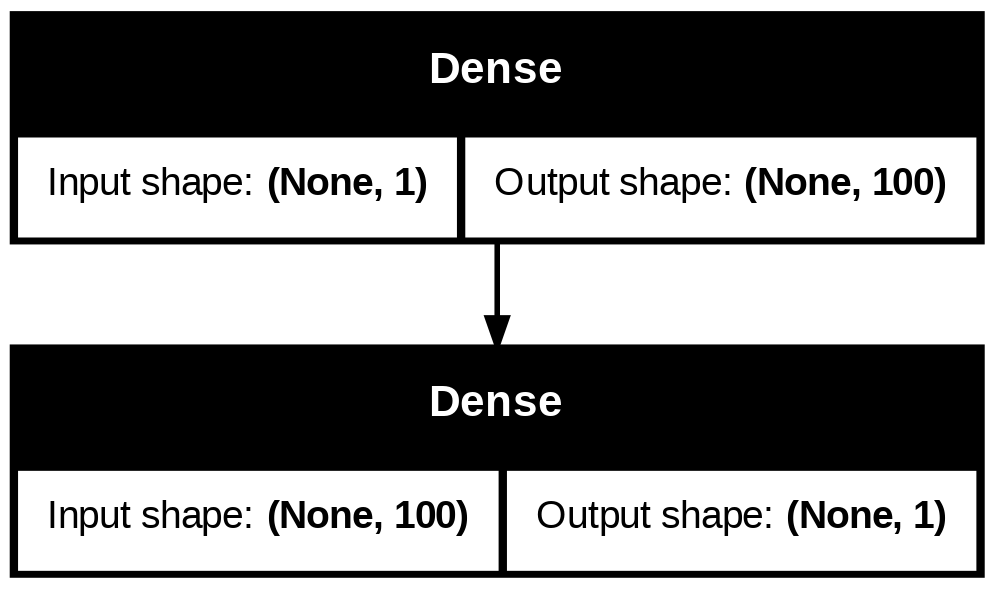

In [164]:
# Let's plot the model
from tensorflow.keras.utils import plot_model
plot_model(model=model_5, show_shapes=True)